In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# Memuat dataset Mall_Customers dari file CSV
data = pd.read_csv('Mall_Customers.csv')  # Ganti dengan path yang sesuai

# Tampilkan beberapa baris pertama dari dataset
print(data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [2]:
# Memilih kolom yang relevan untuk clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]  # Ganti sesuai dengan nama kolom yang benar


In [3]:
# Clustering menggunakan KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(X)

# Menampilkan hasil clustering KMeans
print(data[['Annual Income (k$)', 'Spending Score (1-100)', 'KMeans_Cluster']].head())

# Clustering menggunakan DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['DBSCAN_Cluster'] = dbscan.fit_predict(X)

# Menampilkan hasil clustering DBSCAN
print(data[['Annual Income (k$)', 'Spending Score (1-100)', 'DBSCAN_Cluster']].head())


   Annual Income (k$)  Spending Score (1-100)  KMeans_Cluster
0                  15                      39               2
1                  15                      81               2
2                  16                       6               2
3                  16                      77               2
4                  17                      40               2
   Annual Income (k$)  Spending Score (1-100)  DBSCAN_Cluster
0                  15                      39              -1
1                  15                      81              -1
2                  16                       6              -1
3                  16                      77              -1
4                  17                      40              -1


C:\Users\Risma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [7]:
from sklearn.metrics import silhouette_score
import numpy as np

# Mengambil fitur yang relevan untuk clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Hitung silhouette score untuk KMeans
kmeans_silhouette = silhouette_score(X, data['KMeans_Cluster'])

# Menghitung jumlah cluster yang valid untuk DBSCAN
unique_labels_dbscan = np.unique(data['DBSCAN_Cluster'])

# Cek apakah ada lebih dari satu cluster
if len(unique_labels_dbscan) > 1:
    # Hanya ambil data yang bukan outlier
    filtered_data = data[data['DBSCAN_Cluster'] != -1]
    dbscan_silhouette = silhouette_score(
        filtered_data[['Annual Income (k$)', 'Spending Score (1-100)']],
        filtered_data['DBSCAN_Cluster']
    )
else:
    dbscan_silhouette = "No valid clusters found (only one cluster, all points are outliers)"

# Cetak hasil silhouette score
print(f'Silhouette Score KMeans: {kmeans_silhouette}')
print(f'Silhouette Score DBSCAN: {dbscan_silhouette}')


Silhouette Score KMeans: 0.46761358158775435
Silhouette Score DBSCAN: No valid clusters found (only one cluster, all points are outliers)


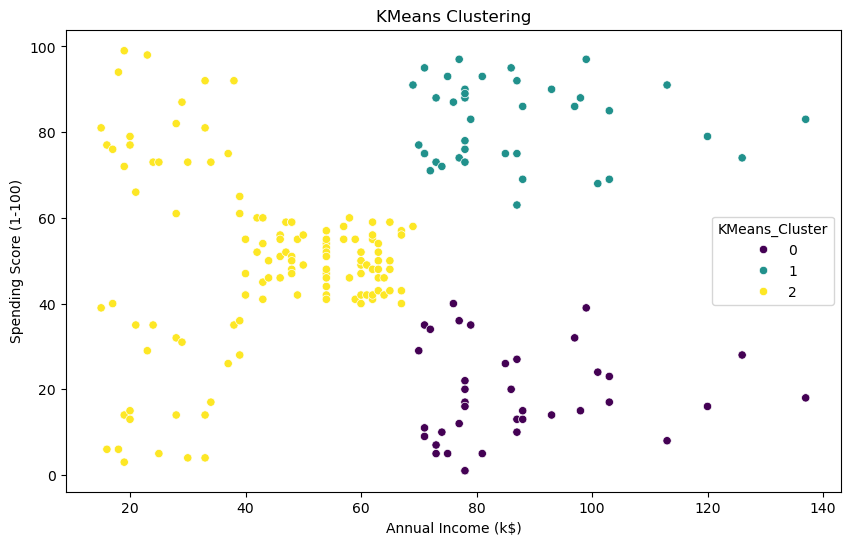

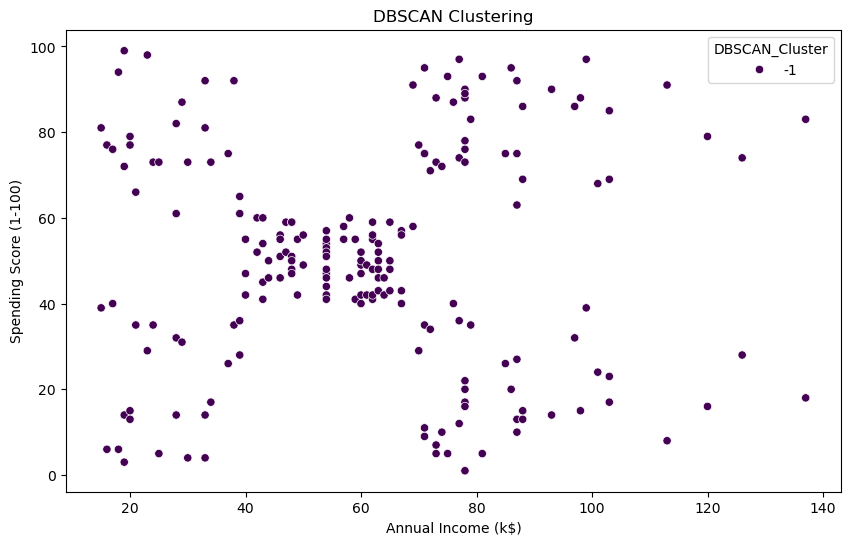

In [4]:
# Visualisasi hasil clustering KMeans
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='KMeans_Cluster', data=data, palette='viridis')
plt.title('KMeans Clustering')
plt.show()

# Visualisasi hasil clustering DBSCAN
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='DBSCAN_Cluster', data=data, palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()
